# The Data Visualization in Python


Come molti di voi avranno notato, **Kaggle** lancia ogni anno un sondaggio relativo a AI, ML e Data Science.
I risultati dell'indagine sono pubblici e scaricabili da 
https://www.kaggle.com/kaggle/kaggle-survey-2018

In questo notebook cerchiamo di capire qualcosa di più sulla data visualizazion in *Python* prendendo spunto dai dati.

## Import dei dati

Per prima cosa andiamo a caricare i dati dell'indagine

In [1]:
import os
import pandas as pd
import numpy as np

Kaggle ci fornisce tre file CSV da analizzare:
- freeFormResponses.csv (Risultati dalle domande libere)
- multipleChoiceResponses.csv (Risultati da domande a scelta multipla)
- SurveySchema.csv (schema delle risposte)

In [3]:
# Read in data
DIR = '/home/master/Desktop/kaggle-survey-2018/'
freeform_df = pd.read_csv(DIR + 'freeFormResponses.csv', low_memory=False, header=[0,1])
multi_df = pd.read_csv(DIR + 'multipleChoiceResponses.csv', low_memory=False, header=[0,1])
SurveySchema = pd.read_csv(DIR + 'SurveySchema.csv', low_memory=False, header=[0,1])




In [4]:
# Format Dataframes
freeform_df.columns = freeform_df.columns.map('_'.join)
multi_df.columns = multi_df.columns.map('_'.join)
SurveySchema.columns = SurveySchema.columns.map('_'.join)

# For getting all columns
pd.set_option('display.max_columns', None)

Verifichiamo se tutto ok...

In [5]:
multi_df.head()

,Time from Start to Finish (seconds)_Duration (in seconds),Q1_What is your gender? - Selected Choice,Q1_OTHER_TEXT_What is your gender? - Prefer to self-describe - Text,Q2_What is your age (# years)?,Q3_In which country do you currently reside?,Q4_What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Q5_Which best describes your undergraduate major? - Selected Choice,Q6_Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Q6_OTHER_TEXT_Select the title most similar to your current role (or most recent title if retired): - Other - Text,Q7_In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,Q7_OTHER_TEXT_In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text,Q8_How many years of experience do you have in your current role?,Q9_What is your current yearly compensation (approximate $USD)?,Q10_Does your current employer incorporate machine learning methods into their business?,Q11_Part_1_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,Q11_Part_2_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows,"Q11_Part_3_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Q11_Part_4_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas,Q11_Part_5_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning,Q11_Part_6_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - None of these activities are an important part of my role at work,Q11_Part_7_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other,Q11_OTHER_TEXT_Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text,Q12_MULTIPLE_CHOICE_What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice,"Q12_Part_1_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Basic statistical software (Microsoft Excel, Google Sheets, etc.) - Text","Q12_Part_2_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Advanced statistical software (SPSS, SAS, etc.) - Text","Q12_Part_3_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Business intelligence software (Salesforce, Tableau, Spotfire, etc.) - Text","Q12_Part_4_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Local or hosted development environments (RStudio, JupyterLab, etc.) - Text","Q12_Part_5_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Cloud-based data software & APIs (AWS, GCP, Azure, etc.) - Text",Q12_OTHER_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Other - Text,Q13_Part_1_Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - 

In [6]:
freeform_df.head()

,Q11_OTHER_TEXT_Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text,Q12_OTHER_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Other - Text,"Q12_Part_1_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Basic statistical software (Microsoft Excel, Google Sheets, etc.) - Text","Q12_Part_2_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Advanced statistical software (SPSS, SAS, etc.) - Text","Q12_Part_3_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Business intelligence software (Salesforce, Tableau, Spotfire, etc.) - Text","Q12_Part_4_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Local or hosted development environments (RStudio, JupyterLab, etc.) - Text","Q12_Part_5_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Cloud-based data software & APIs (AWS, GCP, Azure, etc.) - Text",Q13_OTHER_TEXT_Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Q14_OTHER_TEXT_Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Q15_OTHER_TEXT_Which of the following cloud computing services have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Q16_OTHER_TEXT_What programming languages do you use on a regular basis? (Select all that apply) - Other - Text,Q17_OTHER_TEXT_What specific programming language do you use most often? - Other - Text,Q18_OTHER_TEXT_What programming language would you recommend an aspiring data scientist to learn first? - Other - Text,Q19_OTHER_TEXT_What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Other - Text,Q1_OTHER_TEXT_What is your gender? - Prefer to self-describe - Text,"Q20_OTHER_TEXT_Of the choices that you selected in the previous question, which ML library have you used the most? - Other - Text",Q21_OTHER_TEXT_What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Other - Text,"Q22_OTHER_TEXT_Of the choices that you selected in the previous question, which specific data visualization library or tool have you used the most? - Other - Text",Q27_OTHER_TEXT_Which of the following cloud computing products have you used at work or school in the last 5 years (Select all that apply)? - Other - Text,Q28_OTHER_TEXT_Which of the following machine learning products have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Q29_OTHER_TEXT_Which of the following relational database products have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Q30_OTHER_TEXT_Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Other - Text,Q31_OTHER_TEXT_Which types of data do you currently interact with most often at work or school? (Select all that apply) - Other Data - Text,Q32_OTHER_What is the type of data that you currently interact with most often at work or school? - Other Data - Text,Q33_OTHER_TEXT_Where do you find public datasets? (Select all that apply) - Other - Text,"Q34_OTHER_TEXT_During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Other",Q35_OTHER_TEXT_What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Other - Text,Q36_OTHER_TEXT_On which online platforms have you begun or completed data scien

Quanti record abbiamo?

Provate a completare il codice...

In [7]:
freeform_df....[0]

SyntaxError: invalid syntax (<ipython-input-7-48197ac0dcba>, line 1)

In [8]:
multi_df.....[0]

SyntaxError: invalid syntax (<ipython-input-8-5a99e6a6ec85>, line 1)

Per meglio analizzare i dati andiamo a rinominare le colonne in modo da avere dei nomi comprensibili...

In [9]:
multi_df = multi_df.rename({'Time from Start to Finish (seconds)_Duration (in seconds)' : 'duration', 
                 'Q1_What is your gender? - Selected Choice' : 'gender', 
                 'Q1_OTHER_TEXT_What is your gender? - Prefer to self-describe - Text' : 'gender_other', 
                 'Q2_What is your age (# years)?' : 'age', 
                 'Q3_In which country do you currently reside?' : 'country', 
                 'Q4_What is the highest level of formal education that you have attained or plan to attain within the next 2 years?' : 'education', 
                 'Q5_Which best describes your undergraduate major? - Selected Choice' : 'major', 
                 'Q6_Select the title most similar to your current role (or most recent title if retired): - Selected Choice' : 'current_title', 
                 'Q6_OTHER_TEXT_Select the title most similar to your current role (or most recent title if retired): - Other - Text' : 'current_title_other', 
                 'Q7_In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice' : 'industry', 
                'Q8_How many years of experience do you have in your current role?' : 'experience', 
                'Q9_What is your current yearly compensation (approximate $USD)?' : 'compensation', 
                'Q10_Does your current employer incorporate machine learning methods into their business?' : 'employerML?', 
                'Q12_MULTIPLE_CHOICE_What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice' : 'primary_tool', 
                'Q17_What specific programming language do you use most often? - Selected Choice' : 'language_often', 
                'Q18_What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice' : 'language_recommend', 
                'Q20_Of the choices that you selected in the previous question, which ML library have you used the most? - Selected Choice' : 'library_most', 
                'Q23_Approximately what percent of your time at work or school is spent actively coding?' : 'time_coding'}, axis='columns')

freeform_df = freeform_df.rename({'Q1_OTHER_TEXT_What is your gender? - Prefer to self-describe - Text' : 'gender', 
                                  'Q21_OTHER_TEXT_What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Other - Text' : 'viz'}, axis = 'columns')

In [10]:
print('Renamed columns in multi_df:')
display(multi_df[['duration', 'gender', 'gender_other', 
          'age', 'country', 'education', 'major', 
          'current_title', 'current_title_other', 
        'industry', 'experience', 'compensation', 
        'employerML?', 'primary_tool', 'language_often', 
        'language_recommend', 'library_most', 'time_coding']].head(0))

print('Renamed columns in freeform_df:')
freeform_df[['gender', 'viz']].head(0)

Renamed columns in multi_df:


,duration,gender,gender_other,age,country,education,major,current_title,current_title_other,industry,experience,compensation,employerML?,primary_tool,language_often,language_recommend,library_most,time_coding


Renamed columns in freeform_df:


,gender,viz


# Matplotlib e dati demografici

Iniziamo ad utilizzare la libreria **Matplotlib** per analizzare i dati demografici

Per prima cosa andiamo ad installare la libreria

In [11]:
!pip install matplotlib

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
import matplotlib.pyplot as plt

Creiamo un grafico a barre per capire come si distribuisce per genere la popolazione che ha risposto al sondaggio.

Utilizziamo direttamente la funzione di **pandas** plot, specificando il tipo di grafico **bar*

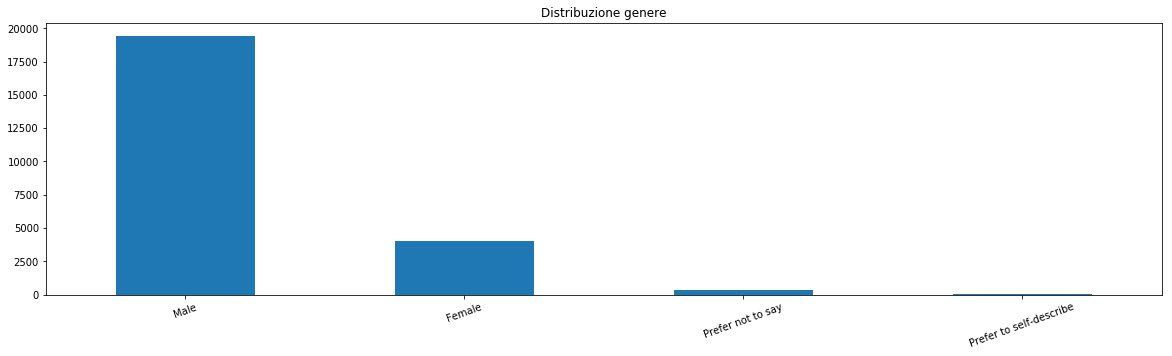

In [13]:
multi_df['gender'].value_counts().plot(kind='bar', 
                                       rot=20, 
                                       title='Distribuzione genere', 
                                       figsize=(20,5))

Oltre alla tipologia **bar** possiamo usare altre grafici:
- line : line plot (default)
- bar : vertical bar plot
- barh : horizontal bar plot
- hist : histogram
- box : boxplot
- kde : Kernel Density Estimation plot
- density : same as ‘kde’
- area : area plot
- pie : pie plot
- scatter : scatter plot
- hexbin : hexbin plot

Provate a completare il codice cercando di visualizzare con delle barre orizzontali la **country** dei data scientist che hanno risposto al questionario

In [ ]:
multi_df['country'].value_counts().sort_values(ascending=True).plot(kind='**************', 
                                             title='Country', 
                                             figsize=(10,20))

# Seaborn e gli ambienti di sviluppo per il Data Scientiest

Utilizzeremo ora la libreria Seaborn per cercare di estrarre qualche suggerimento sull''ambiente di sviluppo (IDE) più utilizzato.


Installaiamo la liberia **Seaborn** con pip ed importiamo la libreria.

In [14]:
!pip install seaborn

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
import seaborn as sns

Anche in questo caso andiamo a sistemare i nomi delle colonne per renderli più facili e comprensibili da usare.

In [16]:
multi_df.head(1)

,duration,gender,gender_other,age,country,education,major,current_title,current_title_other,industry,Q7_OTHER_TEXT_In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text,experience,compensation,employerML?,Q11_Part_1_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,Q11_Part_2_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows,"Q11_Part_3_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Q11_Part_4_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas,Q11_Part_5_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning,Q11_Part_6_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - None of these activities are an important part of my role at work,Q11_Part_7_Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other,Q11_OTHER_TEXT_Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text,primary_tool,"Q12_Part_1_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Basic statistical software (Microsoft Excel, Google Sheets, etc.) - Text","Q12_Part_2_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Advanced statistical software (SPSS, SAS, etc.) - Text","Q12_Part_3_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Business intelligence software (Salesforce, Tableau, Spotfire, etc.) - Text","Q12_Part_4_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Local or hosted development environments (RStudio, JupyterLab, etc.) - Text","Q12_Part_5_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Cloud-based data software & APIs (AWS, GCP, Azure, etc.) - Text",Q12_OTHER_TEXT_What is the primary tool that you use at work or school to analyze data? (include text response) - Other - Text,Q13_Part_1_Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Jupyter/IPython,Q13_Part_2_Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - RStudio,Q13_Part_3_Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - PyCharm,Q13_Part_4_Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Visual Studio Code,Q13_Part_5_Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - nteract,Q13_Part_6_Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Atom,Q13_Part_7_Which of the follow

In [17]:

multi_df = multi_df.rename({'Q13_Part_1_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Jupyter/IPython' : 'Jupyter', 
                 'Q13_Part_2_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - RStudio' : 'RStudio',
                 'Q13_Part_3_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - PyCharm': 'PyCharm',
                'Q13_Part_4_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Visual Studio Code': 'Visual Studio Code',
                'Q13_Part_5_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - nteract': 'nteract',
                'Q13_Part_6_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Atom': 'Atom',
                'Q13_Part_7_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - MATLAB': 'MATLAB',
                'Q13_Part_8_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Visual Studio': 'Visual Studio',
                'Q13_Part_9_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Notepad++': 'Notepad++',
                'Q13_Part_10_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Sublime Text': 'Sublime Text',
                'Q13_Part_11_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Vim': 'Vim',
                'Q13_Part_12_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - IntelliJ': 'IntelliJ',
                'Q13_Part_13_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Spyder': 'Spyder',
                'Q13_Part_14_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - None': 'None',
                'Q13_Part_15_Which of the following integrated development environments (IDE\'s) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Other': 'Other',
                 }, axis = 'columns')

ide = multi_df[['Jupyter','RStudio','PyCharm','Visual Studio Code','nteract','Atom','MATLAB','Visual Studio','Notepad++','Sublime Text','Vim','IntelliJ','Spyder','None','Other']]


In [18]:
ide = ide.fillna(0).replace('[^\\d]',1, regex=True)
ide.head()

,Jupyter,RStudio,PyCharm,Visual Studio Code,nteract,Atom,MATLAB,Visual Studio,Notepad++,Sublime Text,Vim,IntelliJ,Spyder,None,Other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


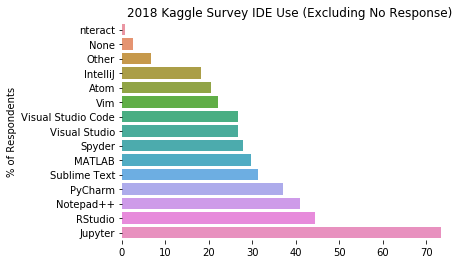

In [19]:
color_pal = sns.color_palette("hls", 16)
ide_qs_binary_drop_noresponse = ide.copy()
ide_qs_binary_drop_noresponse['no reponse'] = ide_qs_binary_drop_noresponse\
    .sum(axis=1)\
    .apply(lambda x: 1 if x == 0 else 0)
    
ide_qs_binary_drop_noresponse = ide_qs_binary_drop_noresponse\
    .loc[ide_qs_binary_drop_noresponse['no reponse'] == 0]\
    .drop('no reponse', axis=1).copy()

plot_df = ((ide_qs_binary_drop_noresponse.sum() / ide_qs_binary_drop_noresponse.count()).sort_values() * 100 ).round(2)

g = sns.barplot(y=plot_df.index,x=plot_df.values)
g.set_ylabel('% of Respondents')
g.set_title('2018 Kaggle Survey IDE Use (Excluding No Response)')
sns.despine(left=True, bottom=True)

plt.show()

Verifichiamo cosa usano gli studenti...

In [20]:
multi_df['current_title']

0                     Consultant
1                          Other
2                 Data Scientist
3                   Not employed
4                   Data Analyst
5                 Data Scientist
6                          Other
7                          Other
8                   Not employed
9              Software Engineer
10                       Student
11                Data Scientist
12                       Student
13            Research Assistant
14                  Data Analyst
15                Data Scientist
16                Data Scientist
17                         Other
18                         Other
19                Data Scientist
20                 Chief Officer
21                       Student
22                       Manager
23            Research Scientist
24                Data Scientist
25            Research Assistant
26                         Other
27                  Data Analyst
28              Business Analyst
29             Software Engineer
          

In [21]:
fs = multi_df['current_title']=='Student'
ide_student = ide[fs]

Usiamo delle barre per capire qualcosa...

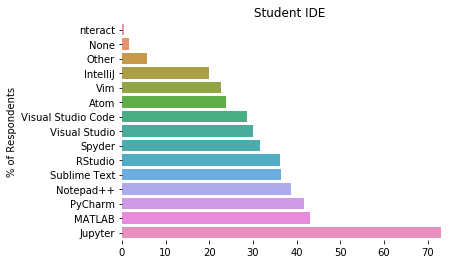

In [23]:
ide_qs_binary_drop_noresponse = ide_student.copy()
ide_qs_binary_drop_noresponse['no reponse'] = ide_qs_binary_drop_noresponse\
    .sum(axis=1)\
    .apply(lambda x: 1 if x == 0 else 0)
    
ide_qs_binary_drop_noresponse = ide_qs_binary_drop_noresponse\
    .loc[ide_qs_binary_drop_noresponse['no reponse'] == 0]\
    .drop('no reponse', axis=1).copy()

plot_df = ((ide_qs_binary_drop_noresponse.sum() / ide_qs_binary_drop_noresponse.count()).sort_values() * 100 ).round(2)


g = sns.barplot(y=plot_df.index,x=plot_df.values)
g.set_ylabel('% of Respondents')
g.set_title('Student IDE')
sns.despine(left=True, bottom=True)

plt.show()

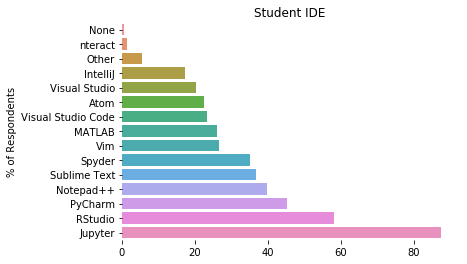

In [24]:
fs = multi_df['current_title']=='Data Scientist'
ds = ide[fs]

ide_qs_binary_drop_noresponse = ds.copy()
ide_qs_binary_drop_noresponse['no reponse'] = ide_qs_binary_drop_noresponse\
    .sum(axis=1)\
    .apply(lambda x: 1 if x == 0 else 0)
    
ide_qs_binary_drop_noresponse = ide_qs_binary_drop_noresponse\
    .loc[ide_qs_binary_drop_noresponse['no reponse'] == 0]\
    .drop('no reponse', axis=1).copy()

plot_df = ((ide_qs_binary_drop_noresponse.sum() / ide_qs_binary_drop_noresponse.count()).sort_values() * 100 ).round(2)


g = sns.barplot(y=plot_df.index,x=plot_df.values)
g.set_ylabel('% of Respondents')
g.set_title('Student IDE')
sns.despine(left=True, bottom=True)

plt.show()

# Bokeh e i linguaggio di programmazione


Vediamo ora di creare qualche grafico interattivo con Bokeh.

Vogliamo capire come si muovono i vari ruoli (Data Scientiest, Research, ...) e il linguaggio di programmazione usato.

In [35]:
!pip install --user bokeh==1.2.0

  Using cached https://files.pythonhosted.org/packages/91/32/58bc30e646e55eab8b21abf89e353f59c0cc02c417e42929f4a9546e1b1d/packaging-19.0-py2.py3-none-any.whl
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Creiamo il set di dati

In [36]:
matrix = multi_df.groupby(['current_title','language_often'])['current_title','language_often'].size().reset_index()
matrix.columns = ['title','language','count']

# filter 
matrix = matrix[matrix['count'] >= 100].reset_index()
matrix.head(30)

,index,title,language,count
0,7,Business Analyst,Python,178
1,11,Business Analyst,SQL,142
2,23,Chief Officer,Python,128
3,40,Consultant,Python,230
4,67,Data Analyst,Python,540
5,68,Data Analyst,R,298
6,71,Data Analyst,SQL,326
7,83,Data Engineer,Python,307
8,104,Data Scientist,Python,2030
9,105,Data Scientist,R,574


In [37]:
matrix.shape[0]

29

In [38]:
pivot_m = matrix.pivot(columns='language',index='title', values='count').fillna(0)
pivot_m.head()

language,C#/.NET,C/C++,Java,Javascript/Typescript,MATLAB,Python,R,SQL
title,,,,,,,,
Business Analyst,0.0,0.0,0.0,0.0,0.0,178.0,0.0,142.0
Chief Officer,0.0,0.0,0.0,0.0,0.0,128.0,0.0,0.0
Consultant,0.0,0.0,0.0,0.0,0.0,230.0,0.0,0.0
Data Analyst,0.0,0.0,0.0,0.0,0.0,540.0,298.0,326.0
Data Engineer,0.0,0.0,0.0,0.0,0.0,307.0,0.0,0.0


In [39]:
data = {}
data['titles'] = []
languages = []
titles = []
for index, row in pivot_m.iterrows():
    titles.append(index)
    data['titles'].append(index)
    for val in pivot_m.columns:
        try:
            data[val].append(row[val])
        except:
            languages.append(val)
            data[val]=[]
            data[val].append(row[val])

data

{'titles': ['Business Analyst',
  'Chief Officer',
  'Consultant',
  'Data Analyst',
  'Data Engineer',
  'Data Scientist',
  'Manager',
  'Not employed',
  'Other',
  'Product/Project Manager',
  'Research Assistant',
  'Research Scientist',
  'Software Engineer',
  'Student'],
 'C#/.NET': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  226.0,
  0.0],
 'C/C++': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  209.0,
  282.0],
 'Java': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  400.0,
  196.0],
 'Javascript/Typescript': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  215.0,
  0.0],
 'MATLAB': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  117.0],
 'Python': [178.0,
  128.0,
  230.0,
  540.0,
  307.0,
  2030.0,
  186.0,
  297.0,
  410.0,
  130.0,
  256.0,
  498.0,
  895.0,
  1924.0],
 'R': [0.

In [40]:

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#E8567F", "#BA5EFF", "#FF695E", "#5BC7FF", "#79FFB0"]

Ora andiamo a visualizzate i dati

In [41]:
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure, output_notebook
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

output_notebook()

output_file("stacked.html")


p = figure(x_range=titles, plot_height=350,  plot_width=1200, title="Role vs Language",
           toolbar_location=None, tools="hover", tooltips="$name @titles: @$name")

p.vbar_stack(languages, x='titles', width=0.8, source=data,
             legend=[value(x) for x in languages],color = colors)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

Loading BokehJS ...